# polygp - Gaussian Process fitting with nested sampling

Fitting Spectral Mixture kernels using polychord nested sampling. Automatic relevance determination over the number of mixture components is included by default.

This tutorial notebook runs a minimal example showcasing the ability to fit a kernel form that is suitable without apriori knowledge

In [1]:
from polygp import SpectralMixtureProcess
import numpy as np
import matplotlib.pyplot as plt

## Setting up the data

We pick a soft example where we are learning a sin function and extrapolating that forward one period

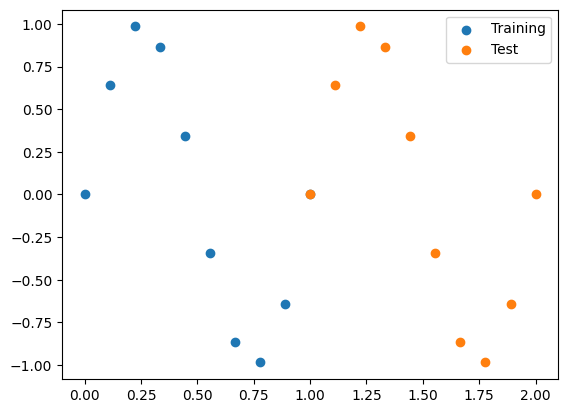

In [2]:
X = np.linspace(0, 1, 10)
Y = np.sin(X*2*np.pi)
X_new = np.linspace(1, 2, 10)
Y_new=np.sin(X_new*2*np.pi)

plt.scatter(X,Y,label="Training")
plt.scatter(X_new,Y_new, label= "Test")
plt.legend()

## Specifing the process
SpectralMixtureProcess is the wrapper class that is implemented, we initialise this with the training data (non-parameteric methods such as GPs always keep the data in mind when making predictions so this seems sensible)

In [3]:
process = SpectralMixtureProcess(X=X,Y=Y)

## Training
Next we train (or fit depending on your favourite terminology), again there are polychord parameters we can play with here, but for now we simply turn the resolution (nlive) down to keep things relatively short

In [20]:
process.train(nlive=10);


PolyChord: MPI is already initilised, not initialising, and will not finalize

PolyChord: Next Generation Nested Sampling
copyright: Will Handley, Mike Hobson & Anthony Lasenby
  version: 1.20.2
  release: 1st June 2021
    email: wh260@mrao.cam.ac.uk

Run Settings
nlive    :      10
nDims    :       7
nDerived :       0
Doing Clustering
Synchronous parallelisation

generating live points


all live points generated

Speed  1 =  0.217E-02 seconds
number of repeats:           14
started sampling

_______________
lives      |10 |
phantoms   |13 |
posteriors | 0 |
equals     | 0 |
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
ncluster   =       1 /       1
ndead      =                  41
nposterior =                   0
nequals    =                   0
nlike      =                  78
<nlike>    =           2.80   (           0.20 per slice )
log(Z)     =          -26.08 +/-  0.42
log(Z_1)   =          -26.08 +/-  0.42 (still evaluating)



________________
lives      | 10 |
phantoms   |107 |
posteriors |  0 |
equals

## Results of the fit

We can plot the results of our fit, showing the 1 and 2 sigma credible regions from our model

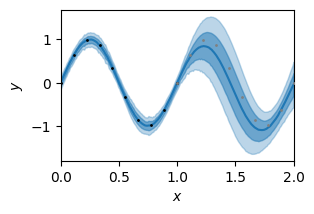

In [5]:
process.plot_observed(xtest=X_new,ytest=Y_new)

We can also look at what we have inferred for the number of spectral components (called alpha internally)

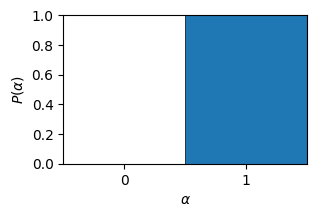

In [6]:
process.plot_n_components()

and we can access the usual anesthetic posterior with some slightly awkward labelling

                     0         1          2         3         4  \
labels        $\delta$   $\mu_0$ $\alpha_k$  $\phi_0$  $\phi_1$   
    weights                                                       
0   0.000000 -5.797103  4.393971   1.313473  1.282859  2.434123   
1   0.000000 -4.861071  4.051074   0.363430  4.746486  0.793310   
2   0.000000 -2.770457  2.071488   1.073900  2.134694  4.873669   
3   0.000000 -2.730750  1.396965   1.166925  2.190028  3.961194   
4   0.000000 -2.053924  1.326354   0.856091  2.302087  3.749738   
...                ...       ...        ...       ...       ...   
165 0.002695 -1.016037  2.460096   1.285965 -0.877602 -0.220243   
166 0.002729 -4.319216  2.079856   1.003002  0.140339 -0.686146   
167 0.002994 -1.082701  2.381518   1.910414 -0.344695 -0.591845   
168 0.003109 -1.073321  2.465697   1.586189 -0.619162 -0.335059   
169 0.003937 -1.538051  2.368877   1.061523 -1.174128 -0.148530   

                          5         6           logL     logL

,1,3,4
1,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,DiagonalAx...


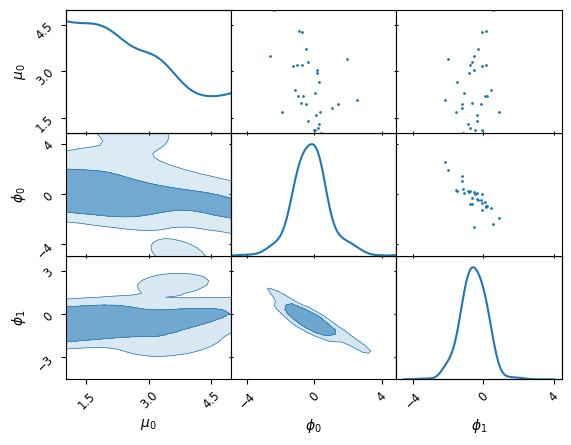

In [19]:
print(process.posterior)
process.posterior.plot_2d(["1","3","4"])

A basic plot corners function is included to dump out corner plots grouped by parameter types

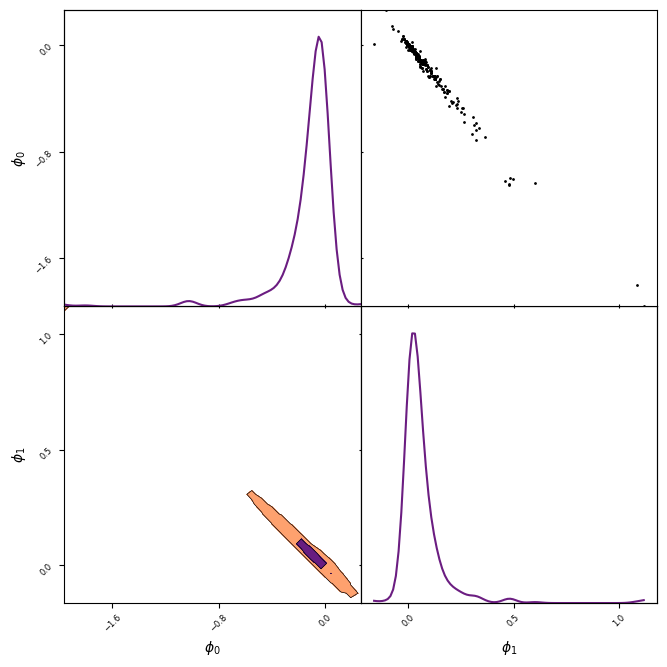

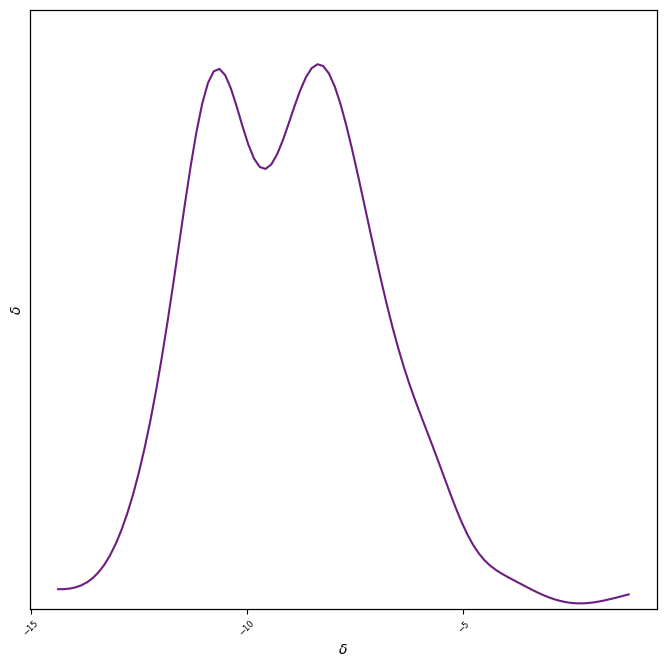

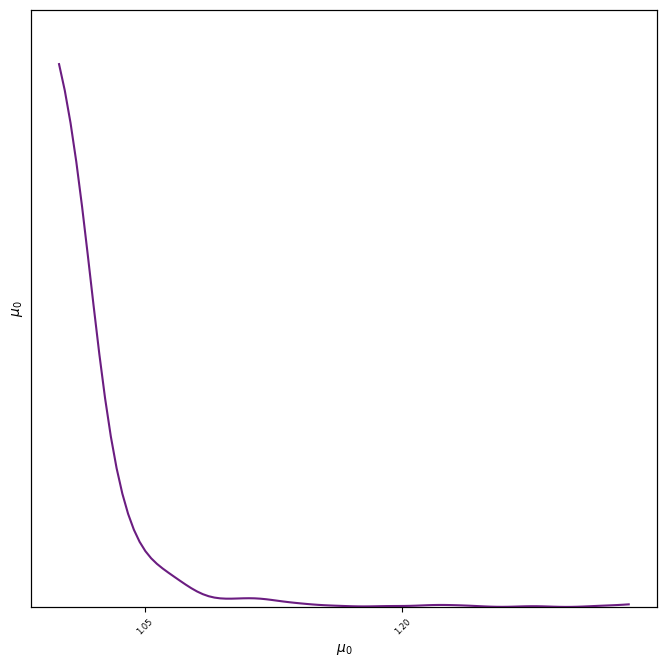

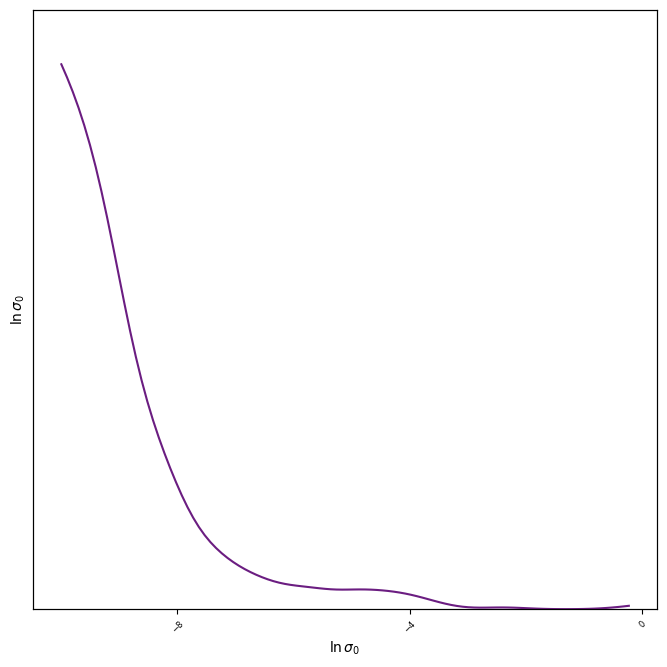

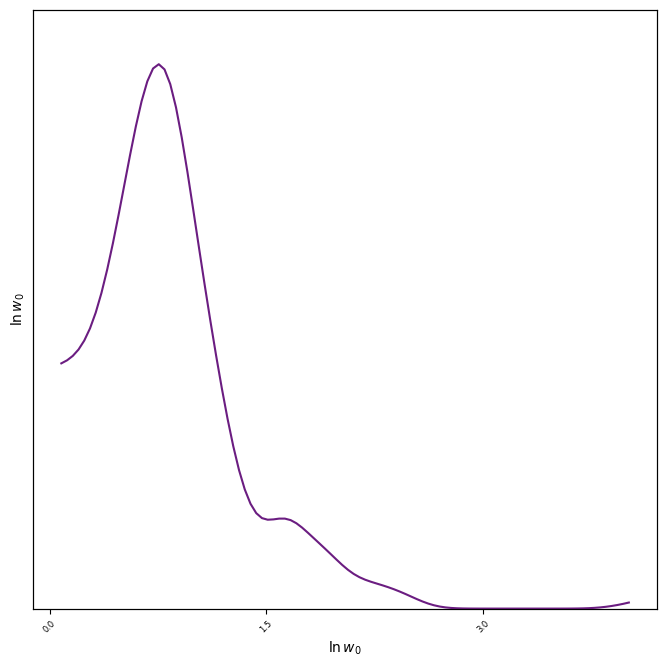

In [9]:
process.plot_corners()

## What does the automatic component determination do?
Let's repeat the exercise but with only gaussian noise!

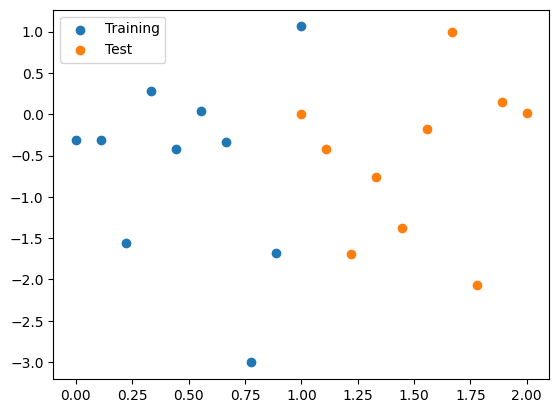

In [13]:
Y=np.random.randn(X.shape[-1])
Y_new = np.random.randn(X_new.shape[-1])
plt.scatter(X,Y,label="Training")
plt.scatter(X_new,Y_new, label= "Test")
plt.legend()

In [16]:
process = SpectralMixtureProcess(X=X,Y=Y)
process.train(nlive=10)

PolyChord: MPI is already initilised, not initialising, and will not finalize

PolyChord: Next Generation Nested Sampling
copyright: Will Handley, Mike Hobson & Anthony Lasenby
  version: 1.20.2
  release: 1st June 2021
    email: wh260@mrao.cam.ac.uk

Run Settings
nlive    :      10
nDims    :       7
nDerived :       0
Doing Clustering
Synchronous parallelisation

generating live points


all live points generated

Speed  1 =  0.405E-02 seconds
number of repeats:           14
started sampling

_______________
lives      |10 |
phantoms   |13 |
posteriors | 0 |
equals     | 0 |
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
ncluster   =       1 /       1
ndead      =                  41
nposterior =                   0
nequals    =                   0
nlike      =                  75
<nlike>    =           2.50   (           0.18 per slice )
log(Z)     =          -26.19 +/-  0.38
log(Z_1)   =          -26.19 +/-  0.38 (still evaluating)



________________
lives      | 10 |
phantoms   |114 |
posteriors |  0 |
equals

chains/samples

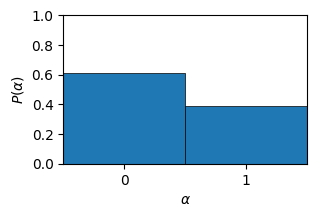

In [17]:
process.plot_n_components()

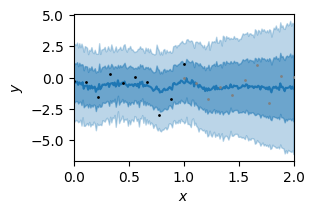

In [18]:
process.plot_observed(xtest=X_new,ytest=Y_new)

Our inference does not find a strong preference for any spectral components and correctly fits only random uncorrelated noise in this case! 